# 板子規格

2.0, 3.0


## 跑步機資訊

### 可讀

* 阻力
* 轉速
* 心律
* 頃角

### 可調

* 阻力
* 頃角
* 聲音 （逼逼叫）

## 腳踏車資訊

### 可讀

* 阻力
* 轉速
* 心律

### 可調

* 阻力
* 聲音 （逼逼叫）




## state 狀態 
* run or ride 跑或騎
* state_rate = 1, 1.5

## energy 能量
* energy = 500

## 影片 fps
* video_fps

## normal_sleep_time 這影片每個 frame 正常休息時間
* normal_sleep_time = 1 / video_fps
* sleep_time = normal_sleep_time * speed_rate

## frame_count 紀錄當下是第幾個 frame 每過完 frame 就 + 1

## power_frame_output 每個 frame 力量輸出 ( 最高是 5 )
* power_frame_output 滑鼠座標 X + Y 決定

## heart rate 心律
* 正常 60 ~ 85, 85 ~ 100 跳緊告
* heart_rate = 60 ~ 85  if energy >= 100
* heart_rate = 85 ~ 100 if 100  > energy

## energy_recover 每個 frame 能量回復
energy_recover = log(heart_rate - 50) * 2 - 4

## resistance 阻力 1 ~ 10 滑鼠左右鍵，鍵盤左右，語音
* resistance = 

## ground_slope 影片中得到會是某個 json 檔取第幾個 frame_count
* slope_ground = $tan(a_g)$ = $\frac{y_1-y_2}{x_1-x_2}$
* $a_g = arctan(slope)$

## modify_slope 可調傾斜角度
* $a_m$

## angle 最後的傾斜角度
* $a = a_g + a_m$

## a 是傾斜角度
* $sin(a)$

## acceleration 加速度
* acceleration = power_frame_output * state_rate * ( 1 - sin(a) )  / ( resistance / 2 ) - 1

## speed 10 ~ -10
* 與影片 fps 掛鉤
* 與休息時間掛鉤
* speed += acceleration

## speed_rate 把速度與睡覺時間掛鉤
* speed_rate = speed * 0.2 + 1                         if speed >= 0
* speed_rate = ( 10 + speed ) * ( 1 / 15 ) + ( 1 / 3 ) if speed < 0









In [ ]:
import math

# print(math.log(2.7183))
# 2 * log - 4
2 * math.log(10) - 4, 2 * math.log(35) - 4, 2 * math.log(50) - 4 

In [ ]:
import time

time.sleep(1/20)

In [ ]:
# math.atan(1) / math.pi * 180
# math.atan(-1) / math.pi * 180


a = math.atan(1)
math.sin(a), math.cos(a)

# 1/(2**0.5)

In [1]:
import json

json_path = "datas/json/MXBK1701_mxi01_30s.json"
data = {
    'road_info' : []
}

# .dumps() as a string
json_string = json.dumps(data)
# Using a JSON string
# with open(json_path, 'w') as outfile:
#     outfile.write(json_string)

# Directly from dictionary
with open(json_path, 'w') as outfile:
    json.dump(json_string, outfile)

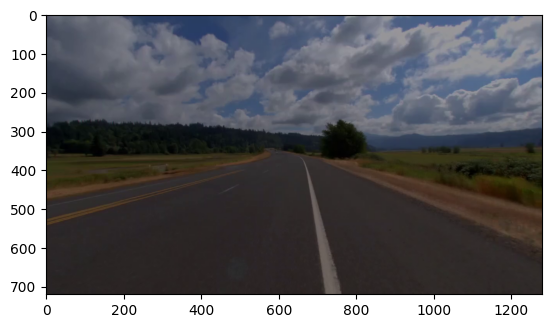

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

video_path = "datas/videos/MXBK1701_mxi01_30s.mp4"
count_fix = 10

cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
  print("Cannot open camera")
  exit()

count = 0
while(True):
  ret, frame = cap.read()
  if not ret:
    print("Can't receive frame (stream end?). Exiting ...")
    break

  count += 1
  if count == count_fix:
    break

cap.release()

cv2.imwrite("output.jpg", frame)

plt.imshow(frame[:,:,::-1])
plt.show()


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

video_path = "datas/videos/MXBK1701_mxi01_30s.mp4"


cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Cannot open camera")
    exit()


# 獲取視頻寬度
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# 獲取視頻高度
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS) #視頻平均幀率


cap.release()




In [6]:
frame_width, frame_height, fps

(1280, 720, 29.97)

In [7]:
import numpy as np

a = [1.3, -2.5, 100, 567.9]

np.clip(a, 0, 500)



array([  1.3,   0. , 100. , 500. ])